Voice Adaptation for Multilingual Communication Using CNNs2

Overview:
Project Significance: Communication across different languages is a common challenge in today’s globalized world. Effective communication is vital for businesses, social interactions, and cultural exchanges.
Innovation: This project focuses on addressing the challenge of language barriers by developing a system that adapts a person’s voice for seamless communication in multiple languages.
Technology: By leveraging Convolutional Neural Networks (CNNs) and advanced speech processing techniques, this system aims to go beyond traditional text-based translation to provide a more natural and personalized communication experience.


In [ ]:
pip install pydub


In [ ]:
pip install googletrans

In [ ]:
pip install deep-translator


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.2 MB/s eta 0:00:00


In [ ]:
from deep_translator import GoogleTranslator

def translate_text(text, dest_language='es'):
    translated_text = GoogleTranslator(source='auto', target=dest_language).translate(text)
    print(f"Translated Text: {translated_text}")
    return translated_text


In [ ]:
pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=30317f5874be5e98b303cba6aa0696a7a40309a7f522c0ceaf14b5a112ab7118
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: googletrans
    Found existing installation: googletrans 3.0.0
    Uninstalling googletrans-3.0.0:
      Successfully uninstalled googletrans-3.0.0


In [ ]:
!pip install gtts


In [ ]:
!pip install gtts googletrans==4.0.0-rc1 pydub SpeechRecognition


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 28.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importting necessary libraries
import os
from gtts import gTTS
import speech_recognition as sr
from googletrans import Translator
from pydub import AudioSegment
from pydub.playback import play
from google.colab import files
from IPython.display import Audio
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
# Convert MP3 to WAV using pydub
def convert_mp3_to_wav(mp3_file, wav_file):
    audio = AudioSegment.from_mp3(mp3_file)
    audio.export(wav_file, format="wav")
    print(f"Converted {mp3_file} to {wav_file}")

In [ ]:
# Recognize speech from an audio file
def recognize_speech_from_audio(audio_file):
    recognizer = sr.Recognizer()
    try:
        with sr.AudioFile(audio_file) as source:
            audio_data = recognizer.record(source)
            text = recognizer.recognize_google(audio_data)
            print(f"Recognized Text: {text}")
            return text
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio")
        return None
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")
        return None


In [ ]:
# Translate text to another language
def translate_text(text, dest_language='fr'):
    translator = Translator()
    translation = translator.translate(text, dest=dest_language)
    print(f"Translated Text: {translation.text}")
    return translation.text

In [ ]:
# Convert text to speech in a specified language
def text_to_speech(text, lang='fr', output_file='output.wav'):
    tts = gTTS(text=text, lang=lang)
    tts.save(output_file)
    print(f"Text-to-Speech saved to {output_file}")


In [ ]:
# Adjust pitch and speed of the audio
def adjust_pitch_and_speed(audio_file, pitch_factor, speed_factor):
    audio = AudioSegment.from_wav(audio_file)
    new_sample_rate = int(audio.frame_rate * speed_factor)

    # Adjust pitch
    audio = audio._spawn(audio.raw_data, overrides={'frame_rate': new_sample_rate})
    audio = audio.set_frame_rate(44100)

    # Adjust speed
    audio = audio.speedup(playback_speed=speed_factor)

    adjusted_audio_file = "adjusted_" + audio_file
    audio.export(adjusted_audio_file, format="wav")
    print(f"Adjusted pitch and speed saved to {adjusted_audio_file}")
    return adjusted_audio_file

In [ ]:
# Generate a spectrogram from a WAV file
def generate_spectrogram(wav_file):
    y, sr = librosa.load(wav_file)
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.tight_layout()
    plt.show()

    return log_spectrogram

In [ ]:
# Define CNN model
def create_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # Adjust the output layer as needed

    return model

In [ ]:

# Complete pipeline: Convert voice to another language with custom voice, pitch, and speed
def voice_to_language_with_custom_voice(audio_file, dest_language='fr', pitch_factor=0, speed_factor=1.0, voice_data_path=None):
    # Step 1: Convert MP3 to WAV
    wav_file = "converted_audio.wav"
    convert_mp3_to_wav(audio_file, wav_file)

    # Save the original audio
    original_audio_file = "original_" + wav_file
    os.rename(wav_file, original_audio_file)

In [ ]:
def voice_to_language_with_custom_voice(audio_file, dest_language='fr', pitch_factor=0, speed_factor=1.0, voice_data_path=None):
    # Step 1: Convert MP3 to WAV
    wav_file = "converted_audio.wav"
    convert_mp3_to_wav(audio_file, wav_file)

    # Step 2: Recognize speech
    recognized_text = recognize_speech_from_audio(wav_file)
    if not recognized_text:
        print("No text recognized. Exiting.")
        return None

    # Step 3: Translate text
    translated_text = translate_text(recognized_text, dest_language)

    # Step 4: Convert translated text to speech
    tts_file = "translated_speech.wav"
    text_to_speech(translated_text, lang=dest_language, output_file=tts_file)

    # Step 5: Adjust pitch and speed if required
    if pitch_factor != 0 or speed_factor != 1.0:
        tts_file = adjust_pitch_and_speed(tts_file, pitch_factor, speed_factor)

    # Step 6: Integrate custom voice data if provided
    if voice_data_path:
        print(f"Custom voice data integration from {voice_data_path} is yet to be implemented.")

    return wav_file, tts_file


Converted /content/drive/MyDrive/ml/Standard recording 1.mp3 to converted_audio.wav
Recognized Text: good morning myself Nishan tingre
Translated Text: Bonjour moi-même Nishan Tingre
Text-to-Speech saved to translated_speech.wav
Custom voice data integration from /content/drive/MyDrive/ml/cv-corpus-7.0-singleword is yet to be implemented.
Original audio saved to converted_audio.wav
Final output saved to translated_speech.wav


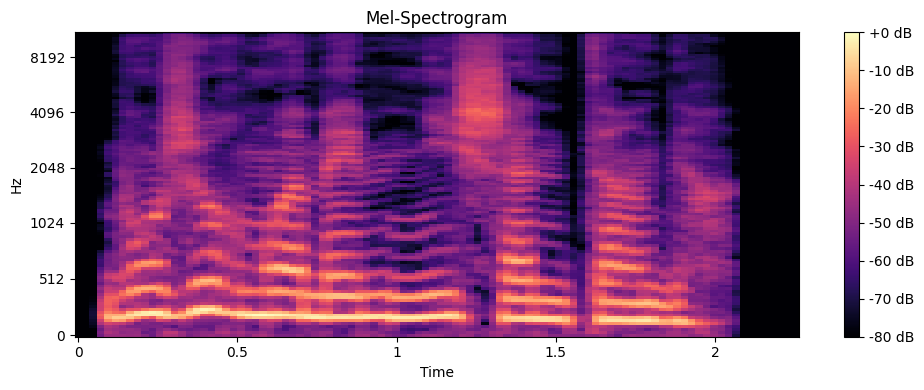

<ipython-input-38-3db858506659>:21: RuntimeWarning: divide by zero encountered in divide
  spectrogram_norm = spectrogram / np.max(spectrogram)
<ipython-input-38-3db858506659>:21: RuntimeWarning: invalid value encountered in divide
  spectrogram_norm = spectrogram / np.max(spectrogram)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       3,211,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,267,722 (12.47 MB)

 Trainable params: 3,267,722 (12.47 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Predictions: [[nan nan nan nan nan nan nan nan nan nan]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Playing original audio...


Playing translated audio...


In [ ]:





# Main execution
audio_file = '/content/drive/MyDrive/ml/Standard recording 1.mp3'
voice_data_path = '/content/drive/MyDrive/ml/cv-corpus-7.0-singleword'  # Use the extracted dataset path

original_audio_file, final_output_file = voice_to_language_with_custom_voice(
    audio_file,
    dest_language='fr',
    pitch_factor=0,
    speed_factor=1.0,
    voice_data_path=voice_data_path
)

print(f"Original audio saved to {original_audio_file}")
print(f"Final output saved to {final_output_file}")

if final_output_file and os.path.exists(final_output_file):
    # Generate and display spectrogram for the new audio
    spectrogram = generate_spectrogram(final_output_file)

    # Normalize and preprocess for CNN
    spectrogram_norm = spectrogram / np.max(spectrogram)
    spectrogram_expanded = np.expand_dims(spectrogram_norm, axis=-1)
    spectrogram_resized = tf.image.resize(spectrogram_expanded, [128, 128])
    spectrogram_input = np.expand_dims(spectrogram_resized, axis=0)

    # Create and compile the CNN model
    input_shape = (128, 128, 1)
    model = create_cnn_model(input_shape)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Display model summary
    model.summary()


    # Make predictions with the CNN model
    predictions = model.predict(spectrogram_input)
    print(f"Predictions: {predictions}")

    # Download the audio files
    files.download(original_audio_file)
    files.download(final_output_file)

    # Play the audio files
    print("Playing original audio...")
    display(Audio(original_audio_file))

    print("Playing translated audio...")
    display(Audio(final_output_file))
else:
    print(f"Final output file {final_output_file} does not exist or is empty.")

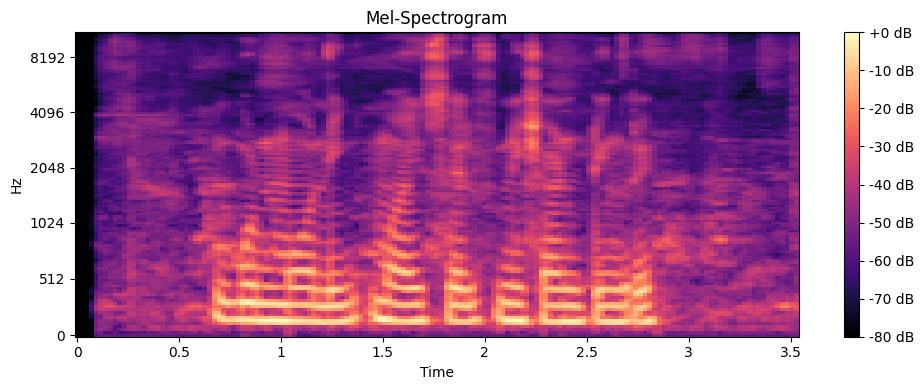

Spectrogram saved to original_spectrogram.png


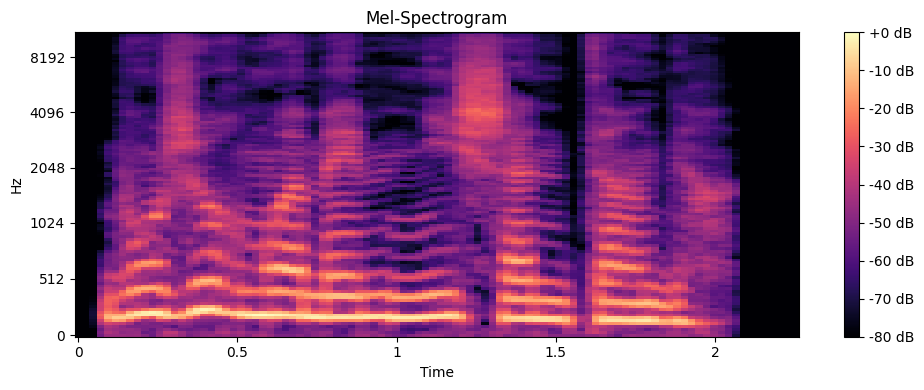

Spectrogram saved to translated_spectrogram.png


In [ ]:
# Generate and save spectrograms for original and translated audio
def generate_and_save_spectrogram(audio_file, output_file):
    spectrogram = generate_spectrogram(audio_file)

    # Save the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram, sr=librosa.get_samplerate(audio_file), x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {audio_file}')
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()
    print(f"Spectrogram saved to {output_file}")

# Generate spectrograms for original and translated audio
original_spectrogram_file = "original_spectrogram.png"
translated_spectrogram_file = "translated_spectrogram.png"

generate_and_save_spectrogram(audio_file, original_spectrogram_file)
if final_output_file and os.path.exists(final_output_file):
    generate_and_save_spectrogram(final_output_file, translated_spectrogram_file)


In [ ]:
# Function to calculate the energy of a spectrogram
def calculate_spectrogram_energy(spectrogram):
    return np.sum(spectrogram ** 2)

# Load the spectrograms and calculate their energies
original_spectrogram = librosa.feature.melspectrogram(y=librosa.load(audio_file)[0], sr=librosa.get_samplerate(audio_file))
translated_spectrogram = librosa.feature.melspectrogram(y=librosa.load(final_output_file)[0], sr=librosa.get_samplerate(final_output_file))

original_energy = calculate_spectrogram_energy(original_spectrogram)
translated_energy = calculate_spectrogram_energy(translated_spectrogram)

# Calculate percentage change in energy
percentage_change = ((translated_energy - original_energy) / original_energy) * 100
print(f"Percentage change in energy: {percentage_change:.2f}%")


Percentage change in energy: 1022.27%


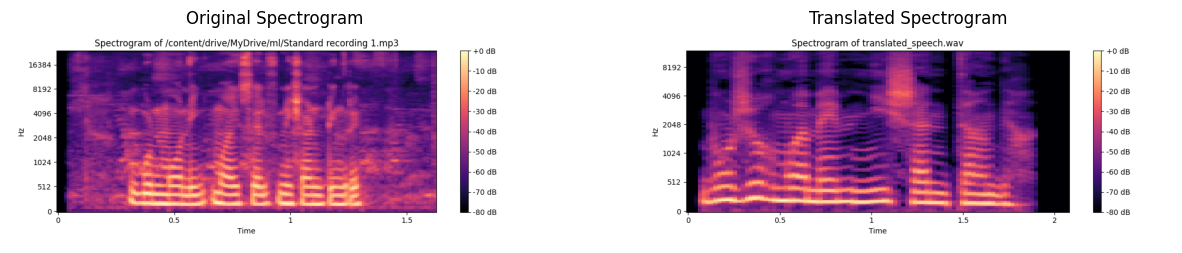

In [ ]:
from PIL import Image

# Load and display spectrogram images
def display_spectrogram_comparison(img_file1, img_file2):
    img1 = Image.open(img_file1)
    img2 = Image.open(img_file2)

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].imshow(img1)
    axes[0].set_title('Original Spectrogram')
    axes[0].axis('off')

    axes[1].imshow(img2)
    axes[1].set_title('Translated Spectrogram')
    axes[1].axis('off')

    plt.show()

display_spectrogram_comparison(original_spectrogram_file, translated_spectrogram_file)
